In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#from google.colab import files
#uploaded = files.upload()

In [4]:
data = pd.read_csv('train1.csv') 
# data.drop('index', axis=1, inplace=True)
# data.drop('id', axis=1, inplace=True)
display(data)

,index,id,date,store_nbr,family,sales,onpromotion
0,0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,4,4,2013-01-01,1,BOOKS,0.000,0
2,8,8,2013-01-01,1,DAIRY,0.000,0
3,12,12,2013-01-01,1,GROCERY I,0.000,0
4,16,16,2013-01-01,1,HOME AND KITCHEN II,0.000,0
...,...,...,...,...,...,...,...
750217,3000868,3000868,2017-08-15,9,GROCERY II,9.000,0
750218,3000872,3000872,2017-08-15,9,HOME APPLIANCES,0.000,0
750219,3000876,3000876,2017-08-15,9,LINGERIE,6.000,0
750220,3000880,3000880,2017-08-15,9,PERSONAL CARE,522.000,11


## Exploratory Data Analysis.

In [5]:
def EDA(df):
    print("Head of dataset:")
    display(df.head())
    print("-----------------------------------------------------------")
    print("Shape of dataset")
    display(df.shape)
    print("-----------------------------------------------------------")
    print("Description of dataset")
    display(df.describe().round(4))
    print("-----------------------------------------------------------")
    print("Info of dataset's column")
    display(df.info())
    print("-----------------------------------------------------------")
    print("Number of null/nan values in each column")
    display(df.isnull().sum())
    print("-----------------------------------------------------------")

EDA(data)

Head of dataset:


,index,id,date,store_nbr,family,sales,onpromotion
0,0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,4,4,2013-01-01,1,BOOKS,0.0,0
2,8,8,2013-01-01,1,DAIRY,0.0,0
3,12,12,2013-01-01,1,GROCERY I,0.0,0
4,16,16,2013-01-01,1,HOME AND KITCHEN II,0.0,0


-----------------------------------------------------------
Shape of dataset


(750222, 7)

-----------------------------------------------------------
Description of dataset


,index,id,store_nbr,sales,onpromotion
count,7.502220e+05,7.502220e+05,750222.0000,750222.0000,750222.0000
mean,1.500442e+06,1.500442e+06,27.4714,363.6564,2.6300
std,8.662823e+05,8.662823e+05,15.5836,1129.9898,12.4279
min,0.000000e+00,0.000000e+00,1.0000,0.0000,0.0000
25%,7.502210e+05,7.502210e+05,14.0000,0.0000,0.0000
50%,1.500442e+06,1.500442e+06,27.0000,11.0000,0.0000
75%,2.250663e+06,2.250663e+06,41.0000,200.0248,0.0000
max,3.000884e+06,3.000884e+06,54.0000,89576.3600,726.0000


-----------------------------------------------------------
Info of dataset's column
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750222 entries, 0 to 750221
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        750222 non-null  int64  
 1   id           750222 non-null  int64  
 2   date         750222 non-null  object 
 3   store_nbr    750222 non-null  int64  
 4   family       750222 non-null  object 
 5   sales        750222 non-null  float64
 6   onpromotion  750222 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 40.1+ MB


None

-----------------------------------------------------------
Number of null/nan values in each column


index          0
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

-----------------------------------------------------------


## Top Selling products

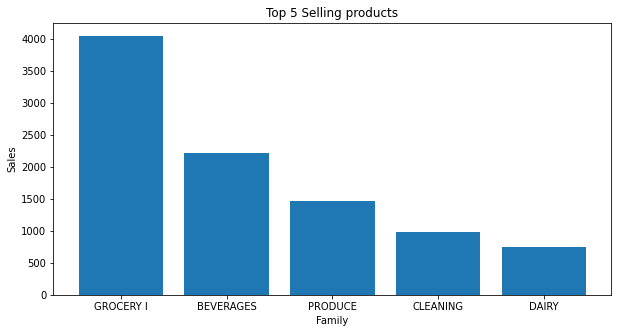

In [6]:
top_selling = pd.pivot_table(data, index='family', values='sales')
top_selling.sort_values('sales', ascending=False, inplace=True)

fig = plt.figure(figsize=(10, 5))
plt.bar(top_selling.index[:5], top_selling['sales'][:5])
plt.xlabel('Family')
plt.ylabel('Sales')
plt.title('Top 5 Selling products')
plt.show()

In [7]:
top_selling

,sales
family,
GROCERY I,4040.399172
BEVERAGES,2219.108076
PRODUCE,1460.277576
CLEANING,986.637987
DAIRY,751.676476
BREAD/BAKERY,443.785655
POULTRY,386.939298
MEATS,376.314933
PERSONAL CARE,253.812747


In [8]:
def modify(df):
    new_df = df.copy()
    new_df['date'] = pd.to_datetime(new_df['date'])
    new_df['day(week)'] = new_df['date'].dt.weekday
    new_df['day'] = new_df['date'].dt.day
    new_df['month'] = new_df['date'].dt.month
    new_df['year'] = new_df['date'].dt.year

    return new_df

df = modify(data)
df.head()

,index,id,date,store_nbr,family,sales,onpromotion,day(week),day,month,year
0,0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,1,1,1,2013
1,4,4,2013-01-01,1,BOOKS,0.0,0,1,1,1,2013
2,8,8,2013-01-01,1,DAIRY,0.0,0,1,1,1,2013
3,12,12,2013-01-01,1,GROCERY I,0.0,0,1,1,1,2013
4,16,16,2013-01-01,1,HOME AND KITCHEN II,0.0,0,1,1,1,2013


## Correlation Heatmap

<AxesSubplot:>

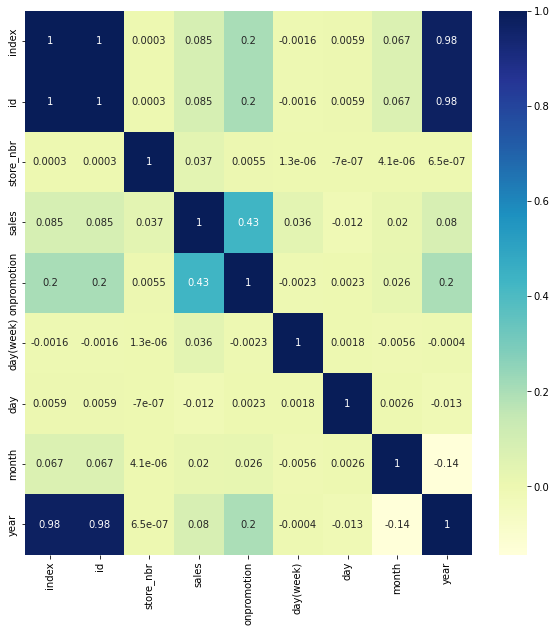

In [9]:
plt.figure(figsize=(10, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")

## Trend over the years
All items and stores have a similar trend in sales over the years

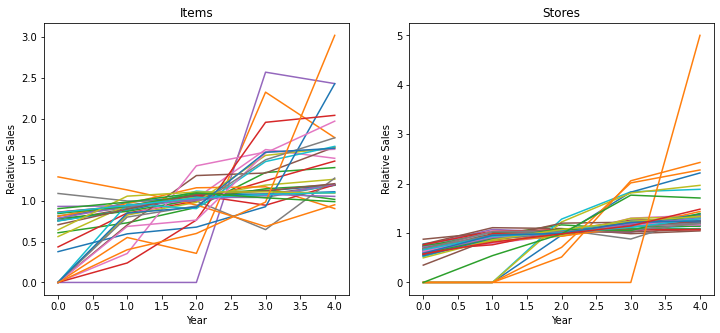

In [10]:
item_mean_year = pd.pivot_table(df, index='year', columns='family',
                               values='sales', aggfunc=np.mean).values
store_mean_year = pd.pivot_table(df, index='year', columns='store_nbr',
                                values='sales', aggfunc=np.mean).values

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(item_mean_year / item_mean_year.mean(0)[np.newaxis])
plt.title("Items")
plt.xlabel("Year")
plt.ylabel("Relative Sales")
plt.subplot(122)
plt.plot(store_mean_year / store_mean_year.mean(0)[np.newaxis])
plt.title("Stores")
plt.xlabel("Year")
plt.ylabel("Relative Sales")
plt.show()

## Trend over the months
All items and store again shows similar growth when compared on a monthly basis.

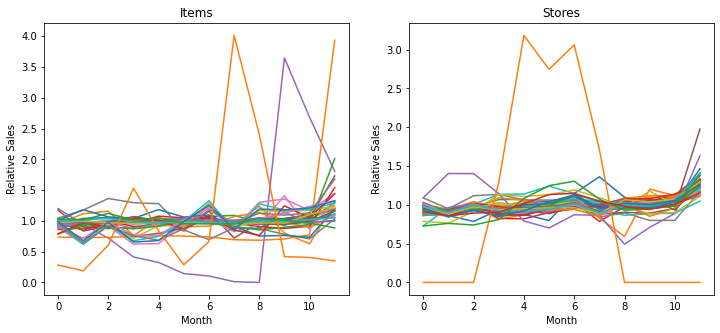

In [11]:
item_mean_month = pd.pivot_table(df, index='month', columns='family',
                                values='sales', aggfunc=np.mean).values
store_mean_month  = pd.pivot_table(df, index='month', columns='store_nbr',
                                 values='sales', aggfunc=np.mean).values

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(item_mean_month/ item_mean_month.mean(0)[np.newaxis])
plt.title("Items")
plt.xlabel("Month")
plt.ylabel("Relative Sales")
plt.subplot(122)
plt.plot(store_mean_month / store_mean_month.mean(0)[np.newaxis])
plt.title("Stores")
plt.xlabel("Month")
plt.ylabel("Relative Sales")
plt.show()

## Trend over the weekdays

Sales of items and stores again shares a common patter over the days of the week.

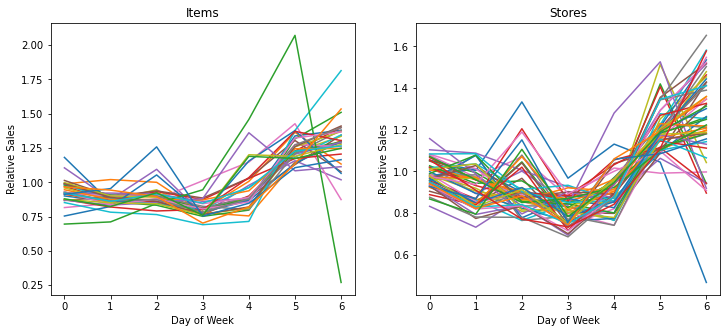

In [12]:
item_mean_day = pd.pivot_table(df, index='day(week)', columns='family',
                              values='sales', aggfunc=np.mean).values
store_mean_day = pd.pivot_table(df, index='day(week)', columns='store_nbr',
                               values='sales', aggfunc=np.mean).values

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(item_mean_day / item_mean_day.mean(0)[np.newaxis])
plt.title("Items")
plt.xlabel("Day of Week")
plt.ylabel("Relative Sales")
plt.subplot(122)
plt.plot(store_mean_day / store_mean_day.mean(0)[np.newaxis])
plt.title("Stores")
plt.xlabel("Day of Week")
plt.ylabel("Relative Sales")
plt.show()

## Preprocessing

In [13]:
#### Encode family column with value between 0 and n_class-1.
#### n = Number of distinct labels.

from sklearn.preprocessing import LabelEncoder

df.drop('date', axis=1, inplace=True)

enc = LabelEncoder()
enc.fit(df['family'])
df['family'] = enc.transform(df['family'])

In [14]:
y = df['sales']
x = df.drop('sales', axis=1)

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Training the model

## Linear Regression
Score is calculated from the coefficient of determination of the prediction.
$R^2$ is defined as $(1 - u/v)$,
where $u$ is the residual sum of squares ((y_true - y_pred)** 2).sum() and $v$ is the total sum of squares ((y_true - y_true.mean()) ** 2).sum()

In [20]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression().fit(X_train, y_train)
print("Train score = ", LR.score(X_train, y_train)) # performance of the model in training data

test_pred = LR.predict(X_test)
test_pred = np.where(test_pred<0, 0, test_pred)

print("Test score = ", LR.score(X_test, y_test)) # performance of the model in test data

Train score =  0.19596272169449247
Test score =  0.19590924504409069


In [17]:
from sklearn.metrics import mean_squared_error

print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, test_pred)))

Root Mean Squared Error: 1021.4005518283044


## XG Boost

In [18]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=200, max_depth=5, eta=0.1)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.100000001,
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [19]:
y_pred = xgb.predict(X_test)
y_pred = np.where(y_pred<0, 0, y_pred)
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 426.9031927473775
